# Заводская калибровка

💡 Идея использовать для заводской калибровки интерактивный документ.

$$S_{xx}^{a}=F_{1}(S_{xx}^{m})=\frac{S_{xx}^{m}-E_{D}}{(S_{xx}^{m}-E_{D})\cdot E_{S}+E_{R}}$$


In [8]:
%matplotlib notebook
%pip install tqdm

import visa
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

rm = visa.ResourceManager()

#visa.log_to_screen()

print(rm)
print(rm.list_resources())

Note: you may need to restart the kernel to use updated packages.
Resource Manager of Visa Library at C:\Windows\system32\visa32.dll
('ASRL1::INSTR',)


In [9]:
#inst = rm.open_resource('TCPIP0::192.168.1.99::INSTR')
#print(inst.query("*IDN?"))
#print(inst.query("SYST:ERR:ALL?"))

#inst2 = rm.open_resource('TCPIP0::192.168.1.251::4880::SOCKET')
inst = rm.open_resource('TCPIP0::192.168.1.212::5025::SOCKET')
inst.write_termination = '\n'
inst.read_termination = '\n'
inst.timeout = 5000
#print(inst2)
print(inst.query("*IDN?"))

Planar, S5048, 15047071, 18.1.5/2


In [17]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import FloatSlider

@interact(Points, points=FloatSlider(min=2, max=1e3, step=1, continuous_update=False))
def Points(points):
    inst.write("SENS:SWE:POIN " + str(points))
#interact(Points, points=201)
#inst2 = rm.open_resource('TCPIP0::127.0.0.1::5025::SOCKET')
#print(inst2.query("*IDN?"))

interactive(children=(FloatSlider(value=2.0, continuous_update=False, description='points', max=1000.0, min=2.…

In [23]:
import qgrid 

#qgrid.nbinstall(overwrite=True)
inst.query("*IDN?")
inst.query("SYST:ERR?")
inst.write("SENS:SWE:POIN 201")
inst.query("SENS:SWE:POIN?")
inst.write("SENS:SWE:TYPE LIN")
inst.query("SENS:SWE:TYPE?")
inst.query("SERV:SWE:FREQ:MAX?")
inst.query("SERV:SWE:FREQ:MIN?")
inst.write("TRIG:SOUR BUS")
inst.query("TRIG:SOUR?")
inst.write("TRIG:SING")

resp = eval('[' + inst.query("CALC:TRAC:DATA:FDAT?") +']')
#deinterleaved = [resp[idx::2] for idx in range(2)]
#qg = qgrid.show_grid(deinterleaved, show_toolbar=True)
#print(resp)

In [19]:
#deinterleaved = [resp[idx::2] for idx in range(2)]    
#length = deinterleaved[0].__len__()
#x = np.linspace(0, 1, length)
#plt.plot(x, deinterleaved[0])

<IPython.core.display.Javascript object>


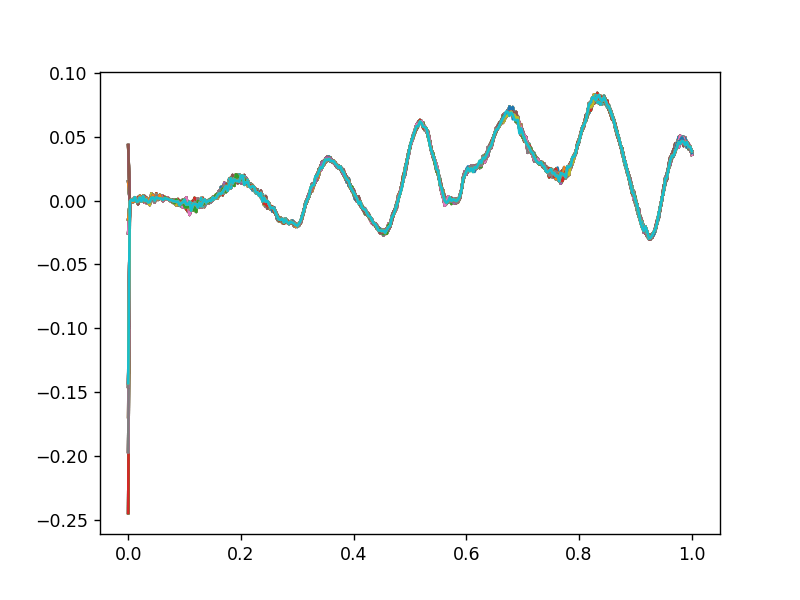

In [18]:
from tqdm import tqdm_notebook
import numpy as np
from IPython import display

for i in tqdm_notebook(range(100)):
    #resp = eval('[' + inst.query("TRACe:DATA:RESP:ALL? CH1Data")+']')
    inst.write("TRIG:SING")
    resp = eval('[' + inst.query("CALC:TRAC:DATA:FDAT?") +']')
    deinterleaved = [resp[idx::2] for idx in range(2)]    
    length = deinterleaved[0].__len__()
    x = np.linspace(0, 1, length)
    plt.plot(x, deinterleaved[0])